<h1>1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

<h4>1. Iris 로드<h1>

In [2]:
import seaborn as sns

# iris 데이터셋 불러오기
iris = sns.load_dataset('iris')

# 데이터 상위 5개 행 확인
print(iris.head())

# 데이터 구조(컬럼, 결측치, 타입 등) 확인
print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<h4>2. 기술통계량 산출</h2>

In [3]:
# Species별 Petal Length의 기술통계량 산출
desc = iris.groupby('species')['petal_length'].describe()
print(desc)

# Species별 데이터 개수 확인
count = iris['species'].value_counts()
print("\nSpecies별 데이터 개수:")
print(count)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

Species별 데이터 개수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<h4>3. 시각화</h2>

/Users/jeong-jinwook/ybigta/session3/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeong-jinwook/ybigta/session3/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jeong-jinwook/ybigta/session3/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


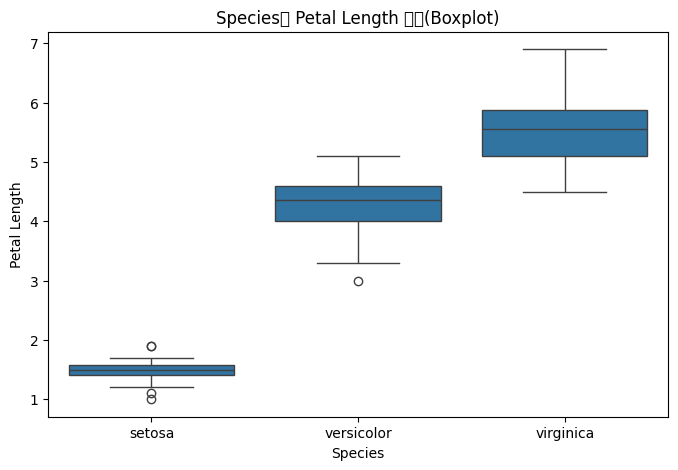

In [4]:
import matplotlib.pyplot as plt
# Boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Species별 Petal Length 분포(Boxplot)')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

virginica 그룹이 평균이 높음

<h4>4. 정규성 검정</h2>

In [5]:
from scipy.stats import shapiro

print("Shapiro-Wilk 정규성 검정 결과 (Species별 Petal Length)")
print("귀무가설: 데이터는 정규분포를 따른다.")
print("대립가설: 데이터는 정규분포를 따르지 않는다.\n")

for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    stat, p = shapiro(data)
    print(f"{species}: p-value = {p:.4f} -> ", end="")
    if p > 0.05:
        print("정규성 가정 만족 (귀무가설 채택)")
    else:
        print("정규성 가정 불만족 (귀무가설 기각)")

Shapiro-Wilk 정규성 검정 결과 (Species별 Petal Length)
귀무가설: 데이터는 정규분포를 따른다.
대립가설: 데이터는 정규분포를 따르지 않는다.

setosa: p-value = 0.0548 -> 정규성 가정 만족 (귀무가설 채택)
versicolor: p-value = 0.1585 -> 정규성 가정 만족 (귀무가설 채택)
virginica: p-value = 0.1098 -> 정규성 가정 만족 (귀무가설 채택)


<h4>5. 등분산성 검정</h2>

In [16]:
from scipy.stats import levene
# 각 그룹의 petal_length 데이터 추출
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# Levene 등분산성 검정
print("Levene 등분산성 검정 결과 (Species별 Petal Length)")
print("귀무가설: 세 그룹의 분산은 모두 같다.")
print("대립가설: 적어도 한 그룹의 분산이 다르다.\n")

stat, p = levene(setosa, versicolor, virginica)
print(f"p-value = {p:.4f} -> ", end="")
if p > 0.05:
    print("등분산성 가정 만족 (귀무가설 채택)")
else:
    print("등분산성 가정 불만족 (귀무가설 기각)")

Levene 등분산성 검정 결과 (Species별 Petal Length)
귀무가설: 세 그룹의 분산은 모두 같다.
대립가설: 적어도 한 그룹의 분산이 다르다.

p-value = 0.0000 -> 등분산성 가정 불만족 (귀무가설 기각)


<h4>6. 가설 수립</h2>

귀무가설(H₀):
3개 Species(품종) 간 Petal Length(꽃잎 길이)의 평균은 모두 같다. <br>
대립가설(H₁):
적어도 한 개 이상의 Species(품종)에서 Petal Length(꽃잎 길이)의 평균이 다르다.

<h4>7. ANOVA 실행</h2>

In [7]:
from scipy.stats import f_oneway

# 각 그룹의 petal_length 데이터 추출
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# One-way ANOVA 실행
f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print("One-way ANOVA 결과 (Species별 Petal Length)")
print(f"F값: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("p-value < 0.05 이므로 귀무가설 기각 → 세 그룹의 평균이 적어도 하나는 다르다.")
else:
    print("p-value >= 0.05 이므로 귀무가설 채택 → 세 그룹의 평균이 모두 같다.")

One-way ANOVA 결과 (Species별 Petal Length)
F값: 1180.1612
p-value: 0.0000
p-value < 0.05 이므로 귀무가설 기각 → 세 그룹의 평균이 적어도 하나는 다르다.


<h4>8. 사후검정</h2>

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Tukey HSD 사후검정 실행
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


setosa-versicolor, setosa-virginica, versicolor-virginica 사이에 유의미한 차이가 있다

<h4>9. 결과 요약</h4>

Boxplot과 기술통계량을 보면 virginica 그룹의 Petal Length(꽃잎 길이) 평균이 가장 길고, 그 다음이 versicolor, setosa가 가장 짧음.<br>
ANOVA 분석 결과 세 그룹 간 Petal Length의 평균에 유의미한 차이가 있음이 확인됨 (p-value < 0.05, 귀무가설 기각). <br>
Tukey HSD 사후검정 결과, 모든 그룹 쌍(setosa–versicolor, setosa–virginica, versicolor–virginica)에서 <br>
평균의 차이가 통계적으로 유의미함이 확인됨

<h1>2. 실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

<h4>1. 데이터 로드 및 기본탐색

In [9]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('creditcard.csv')

# 데이터 상위 5개 행 확인
print(df.head())

# 데이터 구조(컬럼, 결측치, 타입 등) 확인
print(df.info())

# 기술통계량 확인
print(df.describe())

# Class 비율(정상/사기 거래 비율) 확인
print("\nClass 비율:")
print(df['Class'].value_counts(normalize=True))  # 비율
print("\nClass별 건수:")
print(df['Class'].value_counts())  # 건수

# 정상 거래와 사기 거래 건수 각각 출력
normal_count = df['Class'].value_counts()[0]
fraud_count = df['Class'].value_counts()[1]
print(f"\n정상 거래 건수: {normal_count}")
print(f"사기 거래 건수: {fraud_count}")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<h4>2. 샘플링

In [10]:
# 사기 거래(Class=1)는 모두 유지
fraud = df[df['Class'] == 1]

# 정상 거래(Class=0)는 10,000건만 무작위 샘플링 (random_state=42)
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)

# 두 데이터셋 합치기
sampled_df = pd.concat([fraud, normal], ignore_index=True)

# 샘플링 후 Class 비율 출력
print("샘플링 후 Class 비율:")
print(sampled_df['Class'].value_counts(normalize=True))
print("\n샘플링 후 Class별 건수:")
print(sampled_df['Class'].value_counts())

샘플링 후 Class 비율:
Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64

샘플링 후 Class별 건수:
Class
0    10000
1      492
Name: count, dtype: int64


<h4>3. 데이터 전처리

In [11]:
from sklearn.preprocessing import StandardScaler

# Amount 변수 표준화
scaler = StandardScaler()
sampled_df['Amount_Scaled'] = scaler.fit_transform(sampled_df[['Amount']])

# Amount 원본 변수 제거
sampled_df = sampled_df.drop(columns=['Amount'])

# X, y로 분리
X = sampled_df.drop(columns=['Class'])
y = sampled_df['Class']

# 결과 확인
print(X.head())
print(y.value_counts())

     Time        V1        V2        V3        V4        V5        V6  \
0   406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1   472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049 -0.465211   
1  0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477  1.375966   
2  0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391  0.172726   
3 -3.496197 -0.248778 -0.247768  ... -0.171608  0.573574  0.176968 -0.436207   
4  1.713445 -0.496358 -1.282858  ...  0.009061 -0.379068 -0.704181 -0.656805   

        V24       V25       V26       V27       V28  Amount_Scaled  
0  0.320198

<h4> 4. 학습데이터와 테스트데이터 분할

In [12]:
from sklearn.model_selection import train_test_split

# 학습셋:테스트셋 8:2로 분할, 클래스 비율 유지(stratify), random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 분할된 데이터의 Class 비율 출력
print("학습 데이터 Class 비율:")
print(y_train.value_counts(normalize=True))
print("\n테스트 데이터 Class 비율:")
print(y_test.value_counts(normalize=True))

학습 데이터 Class 비율:
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64

테스트 데이터 Class 비율:
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


<h4>5. SMOTE 적용

In [13]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 학습 데이터에 SMOTE 적용 (X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 적용 전 사기 거래 건수
print("SMOTE 적용 전 사기 거래 건수:", y_train.value_counts()[1])

# 적용 후 사기 거래 건수
print("SMOTE 적용 후 사기 거래 건수:", y_train_smote.value_counts()[1])

SMOTE 적용 전 사기 거래 건수: 394
SMOTE 적용 후 사기 거래 건수: 7999


SMOTE를 적용해야 하는 이유: <br>
SMOTE(Synthetic Minority Over-sampling Technique)는
소수 클래스(여기서는 사기 거래)의 데이터를 인공적으로 생성하여
클래스 불균형 문제를 해결하는 기법임.<br>
데이터가 불균형하면, 모델이 다수 클래스(정상 거래)에 치우쳐
소수 클래스(사기 거래)를 잘 예측하지 못하는 문제가 발생함.<br>
SMOTE를 적용하면 소수 클래스의 표본 수가 늘어나
모델이 소수 클래스도 잘 학습할 수 있게 도와줌.

<h4>6. 모델 학습

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score

# 1. 모델 생성 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

# 2. 테스트셋에서 예측값과 예측 확률 구하기
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # 1(사기) 클래스의 확률

# 3. classification_report로 평가
print("분류 리포트 (classification_report):")
print(classification_report(y_test, y_pred))

# 4. PR-AUC (average_precision_score)
pr_auc = average_precision_score(y_test, y_proba)
print(f"PR-AUC (average_precision_score): {pr_auc:.4f}")

분류 리포트 (classification_report):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.81      0.93      0.87        98

    accuracy                           0.99      2099
   macro avg       0.90      0.96      0.93      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC (average_precision_score): 0.9528


/Users/jeong-jinwook/ybigta/session3/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h4>7. 최종 성능 평가

recall, F1, PR-AUC등의 지표에서 모두 기준을 달성했다고 봐도 될것같다.